In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import sklearn
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
random_seed = 20220517
random.seed = random_seed

np.random.seed = random_seed
#tf.random.set_seed(random_seed)

In [4]:
breast = load_breast_cancer() # boston은 Dictionary 형태

In [5]:
X = pd.DataFrame(breast['data'], columns = breast['feature_names']) # Dictionary 형태를 DataFrame 형태로 변환
Y = breast['target']

In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
np.unique(Y, return_counts = True)

(array([0, 1]), array([212, 357], dtype=int64))

<AxesSubplot:ylabel='count'>

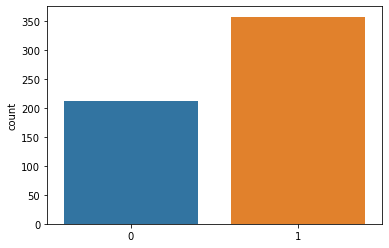

In [8]:
# Y의 Data 개수를 보여줌
sns.countplot(x=Y)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
import tensorflow.keras as keras

In [82]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size = 0.25, random_state = random_seed)

In [83]:
# 얘는 두번 하면 안됨. 위의 train_test_split을 진행하고 나서 다시 실행!!
Train_Y = keras.utils.to_categorical(Train_Y)
Test_Y = keras.utils.to_categorical(Test_Y)

to_categorical()의 필요성

우리가 Output을 A,B,C,D,E 5개의 클래스가 있다고 하면... 0,1,2,3,4로 나오게 되면 이것은 확률이 아님.
따라서 우리는 확률적으로 보기 위해서 to_categorical()을 이용해서 다음과 같이 확률적 관점으로 봄

    |  A  |  B  |  C   |  D  |  E  |
    --------------------------------
    |  1  |  0  |  0   |  0  |  0  |
    |  0  |  1  |  0   |  0  |  0  |
    |  0  |  0  |  1   |  0  |  0  |
    |  0  |  0  |  0   |  1  |  0  |
    |  0  |  0  |  0   |  0  |  1  |

In [84]:
Train_Y.shape

(426, 2)

In [85]:
scaler_X = MinMaxScaler()
scaler_X.fit(Train_X)
#Scaled_Test_X = scaler_X.transform(Test_X)

MinMaxScaler()

In [86]:
Scaled_Train_X = scaler_X.transform(Train_X)
Scaled_Test_X = scaler_X.transform(Test_X)

In [87]:
X.shape

(569, 30)

In [88]:
tf.random.set_seed(random_seed)
model = keras.Sequential()

model.add(keras.layers.Dense(units = 10, input_shape = (30, ), activation = 'sigmoid'))
#model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
#model.add(keras.layers.Dense(units = 1 , activation = 'sigmoid')) 마지막 레이어를 이것 말고도
model.add(keras.layers.Dense(units = 2, activation = 'softmax'))

In [89]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                310       
                                                                 
 dense_21 (Dense)            (None, 5)                 55        
                                                                 
 dense_22 (Dense)            (None, 5)                 30        
                                                                 
 dense_23 (Dense)            (None, 2)                 12        
                                                                 
Total params: 407
Trainable params: 407
Non-trainable params: 0
_________________________________________________________________


In [90]:
_loss = tf.keras.losses.CategoricalCrossentropy() # 우리가 사용하던 binary cross entropy와 동일하다!

In [91]:
lr = 0.1
model.compile(loss = _loss,optimizer = keras.optimizers.SGD(learning_rate = lr))

In [92]:
history = model.fit(Scaled_Train_X, Train_Y, batch_size = 32, epochs = 50, shuffle = True, verbose = 0 ,validation_split = 0.2) 
# verbose=0,1,2중 선택
# validation_split -> validation 데이터의 비율을 결정

In [93]:
train_loss = history.history['loss']
vali_loss = history.history['val_loss']

In [94]:
epochs = range(1, len(train_loss)+1)

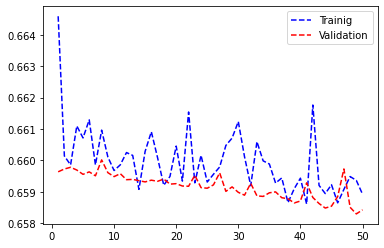

In [95]:
plt.plot(epochs, train_loss, '--b', label = 'Trainig')
plt.plot(epochs, vali_loss, '--r', label = 'Validation')
plt.legend()
plt.show()

In [67]:
pred = model.predict(Scaled_Test_X)